# Investment Analysis

Analyzing my current holding in sharesies account, where the assets I am holding are good or bad investmet, what can be done to maximize returns and minimize risks. How the assets should be allocated?  I am only going to evaluate my US investments in this portfolio and in coming notebooks I will separately evaluate my AUS and NZ stocks.

I am going to use all the methods that I have learned in my course. In future notebooks, I will only use the optimizer that is good and that is widely accepted in the industry.

**Optimization Techniques**: helps to minimize risk and maximize return.

**Optimal Allocation**: after performing optimization, it gives us how much need to bee invetsed into each assets.

In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
tickers= ['META', 'NVDA', 'AMZN', 'TSLA', 'GOOGL', 'AAPL', 'MSFT', 'CRWD', 'MA', 'V', 'SPGI', 'AXP', 'PANW', 'ROK', 'AVGO', 'ORCL', 'ADBE', 'TM', 'INTC', 'SHEL', 'ASML']

In [ ]:
stocks= yf.download(tickers, period='5y')
stocks

[*********************100%***********************]  21 of 21 completed


Price        Adj Close                                                  \
Ticker            AAPL        ADBE        AMZN        ASML        AVGO   
Date                                                                     
2019-12-11   65.626686  303.739990   87.435997  271.517090   27.549707   
2019-12-12   65.793930  305.959991   88.016502  274.575989   28.245943   
2019-12-13   66.688271  317.940002   88.046997  277.109222   27.179182   
2019-12-16   67.829849  323.799988   88.460503  280.053406   27.843538   
2019-12-17   67.963150  322.850006   89.532997  281.840912   27.901278   
...                ...         ...         ...         ...         ...   
2024-12-05  243.039993  538.219971  220.550003  711.500000  170.470001   
2024-12-06  242.839996  552.960022  227.029999  708.979980  179.529999   
2024-12-09  246.750000  547.929993  226.089996  706.520020  178.940002   
2024-12-10  247.770004  547.049988  225.039993  705.270020  171.809998   
2024-12-11  248.270004  550.969971  229.610001  714.559998  182.979996   

Price                                                                  ...  \
Ticker             AXP        CRWD       GOOGL       INTC          MA  ...   
Date                                                                   ...   
2019-12-11  112.624016   47.730000   66.969734  50.340981  282.051758  ...   
2019-12-12  114.491135   47.299999   67.180962  50.764385  284.152161  ...   
2019-12-13  116.432938   49.410000   67.100258  50.976089  287.925201  ...   
2019-12-16  115.462021   49.450001   67.789268  50.896698  288.771210  ...   
2019-12-17  116.647644   48.389999   67.499802  50.543861  287.837677  ...   
...                ...         ...         ...        ...         ...  ...   
2024-12-05  300.529999  364.839996  172.442368  20.799999  524.770020  ...   
2024-12-06  303.989990  365.649994  174.510010  20.920000  528.570007  ...   
2024-12-09  296.720001  353.600006  175.369995  20.809999  522.820007  ...   
2024-12-10  302.109985  346.774994  185.169998  20.160000  529.010010  ...   
2024-12-11  302.371887  362.420013  192.750000  20.145000  533.650024  ...   

Price         Volume                                                          \
Ticker          MSFT       NVDA      ORCL     PANW     ROK     SHEL     SPGI   
Date                                                                           
2019-12-11  18856600  233796000  12159600  2591700  720300  2044640  1267000   
2019-12-12  24612100  404348000  15413200  2999700  828900  2602211  1779500   
2019-12-13  23845400  454704000  21427700  2521200  938500  4002764  1468700   
2019-12-16  24144200  320976000  19951000  3701100  963000  2794717  1172800   
2019-12-17  25425600  321196000  19778400  2540100  908300  4058154  1667500   
...              ...        ...       ...      ...     ...      ...      ...   
2024-12-05  21697800  172621200   6398100  1695000  993300  4866267   991900   
2024-12-06  18821000  188505600  10503400  1979600  652500  5011472   914200   
2024-12-09  19144400  189308600  20158000  2536700  905300  4651261  1205800   
2024-12-10  18469500  210020900  26502000  1746100  900500  3332021  1369500   
2024-12-11   8416936  128584964   8171264   972315  432561  2357017   440887   

Price                                    
Ticker          TM       TSLA         V  
Date                                     
2019-12-11  139400  103467000   7138800  
2019-12-12  150000  116458500  11192100  
2019-12-13   89100   98563500   8558100  
2019-12-16   75900  272613000   8249900  
2019-12-17   70600  127452000  10208700  
...            ...        ...       ...  
2024-12-05  405500   81403600   5200100  
2024-12-06  290600   81455800   4302700  
2024-12-09  376000   96359200   5785300  
2024-12-10  237100   97563600   4539500  
2024-12-11  189509   75773276   2293055  

[1259 rows x 126 columns]

In [ ]:
stocks= stocks['Adj Close'].dropna(how='all')
stocks

Ticker,AAPL,ADBE,AMZN,ASML,AVGO,AXP,CRWD,GOOGL,INTC,MA,...,MSFT,NVDA,ORCL,PANW,ROK,SHEL,SPGI,TM,TSLA,V
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-11,65.626686,303.739990,87.435997,271.517090,27.549707,112.624016,47.730000,66.969734,50.340981,282.051758,...,145.098862,5.410817,52.128216,75.656670,185.968170,47.247120,260.825592,141.619995,23.513332,175.693497
2019-12-12,65.793930,305.959991,88.016502,274.575989,28.245943,114.491135,47.299999,67.180962,50.764385,284.152161,...,146.571854,5.578363,52.276333,75.629997,187.990158,47.543442,259.042969,141.600006,23.978666,176.301620
2019-12-13,66.688271,317.940002,88.046997,277.109222,27.179182,116.432938,49.410000,67.100258,50.976089,287.925201,...,147.805695,5.576371,50.461884,75.663330,186.160278,47.280048,259.915131,142.100006,23.892668,178.714859
2019-12-16,67.829849,323.799988,88.460503,280.053406,27.843538,115.462021,49.450001,67.789268,50.896698,288.771210,...,148.762192,5.605251,49.980507,76.563332,187.020309,47.872681,261.266418,142.529999,25.433332,179.776703
2019-12-17,67.963150,322.850006,89.532997,281.840912,27.901278,116.647644,48.389999,67.499802,50.543861,287.837677,...,147.958755,5.683424,48.915909,76.889999,186.297546,48.127857,260.260101,142.770004,25.266001,179.081650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,243.039993,538.219971,220.550003,711.500000,170.470001,300.529999,364.839996,172.442368,20.799999,524.770020,...,442.619995,145.059998,186.240005,403.029999,297.100006,64.349998,513.890015,174.399994,369.489990,309.079987
2024-12-06,242.839996,552.960022,227.029999,708.979980,179.529999,303.989990,365.649994,174.510010,20.920000,528.570007,...,443.570007,142.440002,191.690002,405.899994,295.420013,63.250000,516.770020,175.949997,389.220001,311.010010
2024-12-09,246.750000,547.929993,226.089996,706.520020,178.940002,296.720001,353.600006,175.369995,20.809999,522.820007,...,446.019989,138.809998,190.449997,388.940002,298.720001,64.699997,513.349976,177.009995,389.790009,308.299988


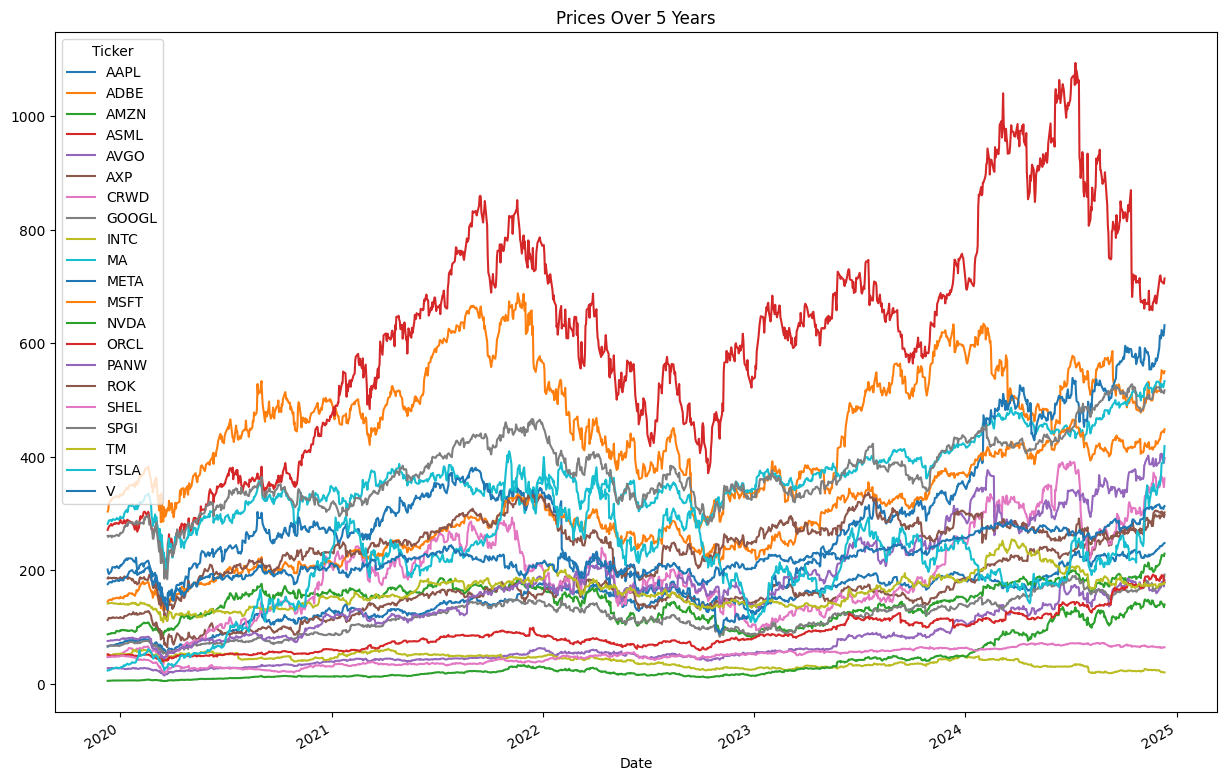

In [ ]:
stocks.plot(kind='line', figsize=(15,10), title='Prices Over 5 Years')
plt.show()

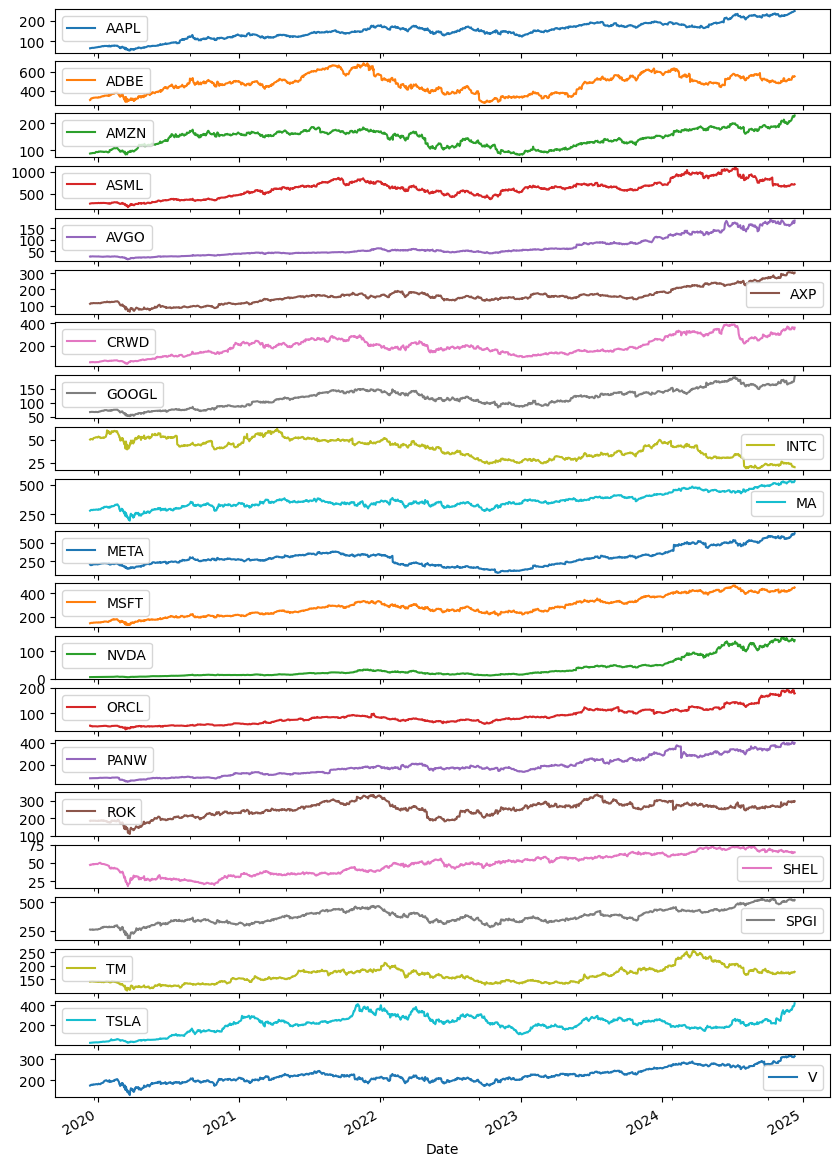

In [ ]:
stocks.plot(kind='line', subplots= True, figsize=(10,16))
plt.show()

In [ ]:
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting

#Covariance Matrix

Start by calculating **Covariance Matrix**, which will tell the relationship between all the assets in the portfolio.

By calculating the sample_covariance, we get the **covariance matrix**

In [ ]:
sample_cov= risk_models.sample_cov(stocks)
sample_cov

Ticker,AAPL,ADBE,AMZN,ASML,AVGO,AXP,CRWD,GOOGL,INTC,MA,...,MSFT,NVDA,ORCL,PANW,ROK,SHEL,SPGI,TM,TSLA,V
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.100240,0.076433,0.067334,0.079759,0.074843,0.053788,0.069674,0.066612,0.067270,0.057950,...,0.072061,0.103285,0.049096,0.058174,0.050271,0.033107,0.052948,0.032650,0.102233,0.051439
ADBE,0.076433,0.147218,0.084408,0.097114,0.090283,0.053790,0.104066,0.078344,0.078555,0.062314,...,0.086002,0.128838,0.061060,0.078953,0.055163,0.028269,0.062870,0.033168,0.105394,0.057138
AMZN,0.067334,0.084408,0.129024,0.083771,0.072465,0.042871,0.097666,0.075054,0.067776,0.047088,...,0.073988,0.112126,0.045744,0.068100,0.044094,0.020175,0.045855,0.030462,0.103212,0.040455
ASML,0.079759,0.097114,0.083771,0.188390,0.124692,0.075663,0.104704,0.078265,0.105537,0.068022,...,0.083715,0.165104,0.056538,0.078787,0.078660,0.059375,0.068193,0.048470,0.126558,0.059886
AVGO,0.074843,0.090283,0.072465,0.124692,0.159161,0.071632,0.096591,0.070137,0.095038,0.064764,...,0.076929,0.149851,0.061423,0.074772,0.072175,0.055058,0.063544,0.043775,0.122257,0.057127
AXP,0.053788,0.053790,0.042871,0.075663,0.071632,0.148029,0.045681,0.056012,0.067813,0.083374,...,0.053502,0.076877,0.050937,0.055758,0.079865,0.080690,0.062242,0.045227,0.081194,0.074410
CRWD,0.069674,0.104066,0.097666,0.104704,0.096591,0.045681,0.298965,0.070411,0.076727,0.050670,...,0.080092,0.150245,0.057035,0.133791,0.050218,0.027842,0.059990,0.034632,0.140615,0.044629
GOOGL,0.066612,0.078344,0.075054,0.078265,0.070137,0.056012,0.070411,0.104638,0.065176,0.056014,...,0.073535,0.103616,0.046355,0.057616,0.050123,0.036553,0.050549,0.032929,0.085802,0.049315
INTC,0.067270,0.078555,0.067776,0.105537,0.095038,0.067813,0.076727,0.065176,0.187241,0.058939,...,0.070806,0.112803,0.058519,0.060952,0.061979,0.049417,0.051478,0.041824,0.096354,0.051126


>> For better portfolio, have the assets which doesn't have strong association/correlation with other assets.

<Axes: >

<Figure size 3000x3000 with 0 Axes>

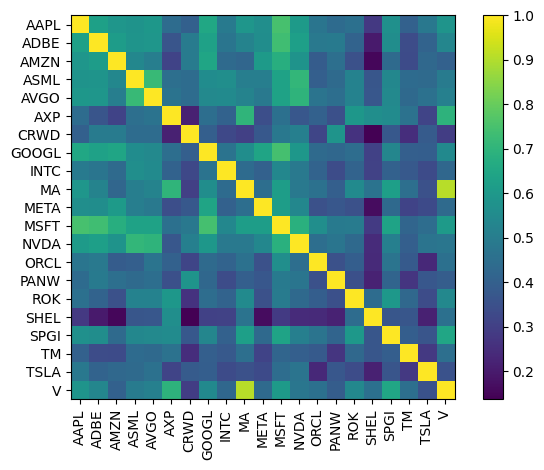

In [ ]:
plt.figure(figsize=(30,30))
plotting.plot_covariance(sample_cov, plot_correlation=True)

>> Most of the asset in our portfolio, has strong correlation with each other. I am trying to remove all the extreme value because it might give incorrect predicition. I will get adjust that using **Ledoit Wolf**.

##Ledoit Wolf

Ledoit Wolf, combines my data (which can be noisy) with a simple model (which is stable) to produce a **covariance matrix** that's more reliable and robust.

<Axes: >

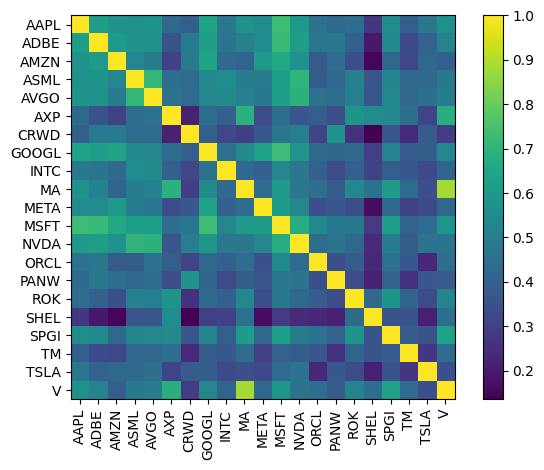

In [ ]:
S= risk_models.CovarianceShrinkage(stocks).ledoit_wolf()
plotting.plot_covariance(S,plot_correlation=True)

##CAPM Model
Financial Model used to estimate the expected return of an investment based on its risk compared to overall market. Helps investor to decide whether an asset is worth investing in by linking risk with return. Expected return from CAPM model is quite stable

In [ ]:
from pypfopt import expected_returns
mu= expected_returns.capm_return(stocks)
mu

,mkt
Ticker,
AAPL,0.279858
ADBE,0.333154
AMZN,0.289958
ASML,0.385972
AVGO,0.356758
AXP,0.283828
CRWD,0.377254
GOOGL,0.280057
INTC,0.320797


In [ ]:
from pypfopt import EfficientFrontier


**LONG/SHORT STRATEGY**

In [ ]:
S= risk_models.CovarianceShrinkage(stocks).ledoit_wolf()
ef= EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.08618),
             ('ADBE', -0.02953),
             ('AMZN', 0.12554),
             ('ASML', -0.04881),
             ('AVGO', -0.0008),
             ('AXP', -0.1389),
             ('CRWD', 0.00257),
             ('GOOGL', 0.06638),
             ('INTC', 0.0045),
             ('MA', -0.11822),
             ('META', -0.01129),
             ('MSFT', 0.0448),
             ('NVDA', -0.12982),
             ('ORCL', 0.11594),
             ('PANW', 0.06651),
             ('ROK', 0.04146),
             ('SHEL', 0.1266),
             ('SPGI', 0.14799),
             ('TM', 0.38352),
             ('TSLA', -0.02659),
             ('V', 0.29197)])

Minus means short and positive means long.

<Axes: title={'center': 'Optimal Portfolio'}>

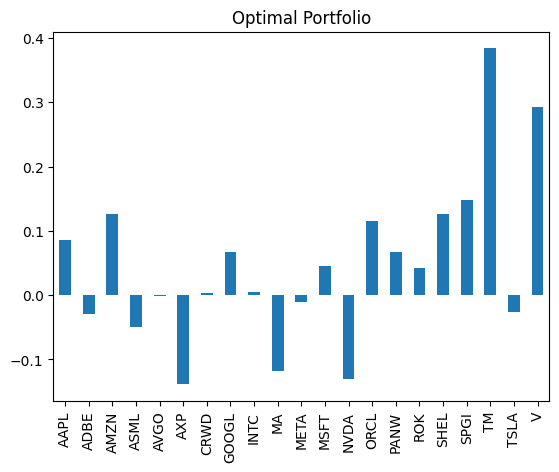

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

In [ ]:
ef.portfolio_performance(verbose=True)

Annual volatility: 19.6%


(None, 0.1961585054255395, None)

**Sharpe Ratio**
Maximize Return

In [ ]:
mu= expected_returns.capm_return(stocks)
S= risk_models.CovarianceShrinkage(stocks).ledoit_wolf()
ef= EfficientFrontier(mu, S)
ef.max_sharpe()
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04751),
             ('ADBE', 0.04784),
             ('AMZN', 0.04739),
             ('ASML', 0.0479),
             ('AVGO', 0.04776),
             ('AXP', 0.04816),
             ('CRWD', 0.04775),
             ('GOOGL', 0.04756),
             ('INTC', 0.04774),
             ('MA', 0.0481),
             ('META', 0.04779),
             ('MSFT', 0.04763),
             ('NVDA', 0.04813),
             ('ORCL', 0.04742),
             ('PANW', 0.04756),
             ('ROK', 0.04764),
             ('SHEL', 0.04739),
             ('SPGI', 0.04733),
             ('TM', 0.04665),
             ('TSLA', 0.04783),
             ('V', 0.04691)])

<Axes: title={'center': 'Optimal Portfolio'}>

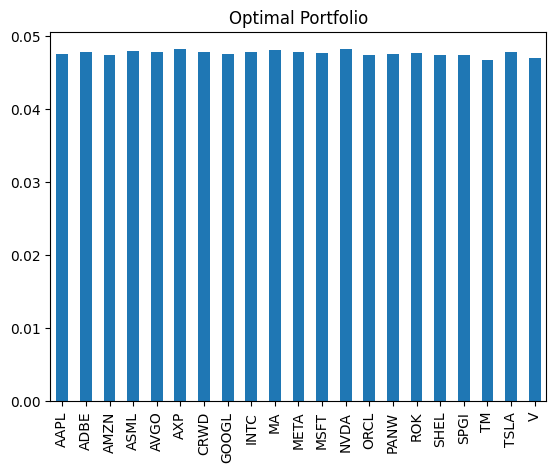

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 26.7%
Sharpe Ratio: 1.14


(0.3032033295990581, 0.26698036398752956, 1.1356765159448974)

**Minimize Risk for a given Return**

Market Neutral: consider both long and short position

In [ ]:
from pypfopt import objective_functions

In [ ]:
ef= EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
ef.efficient_return(target_return=0.3, market_neutral=True)
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', -0.08562),
             ('ADBE', 0.10241),
             ('AMZN', -0.11515),
             ('ASML', 0.22729),
             ('AVGO', 0.13811),
             ('AXP', 0.1801),
             ('CRWD', 0.11193),
             ('GOOGL', -0.05974),
             ('INTC', 0.08297),
             ('MA', 0.0026),
             ('META', 0.12142),
             ('MSFT', -0.03289),
             ('NVDA', 0.44503),
             ('ORCL', -0.19822),
             ('PANW', -0.03617),
             ('ROK', -0.04165),
             ('SHEL', -0.20955),
             ('SPGI', -0.17304),
             ('TM', -0.52232),
             ('TSLA', 0.23938),
             ('V', -0.17689)])

<Axes: title={'center': 'Optimal Portfolio'}>

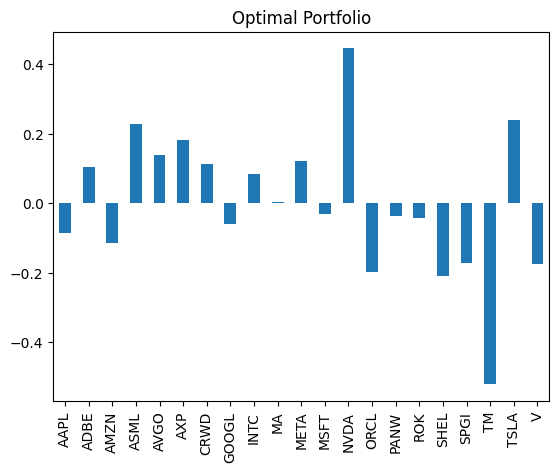

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.0%
Annual volatility: 40.8%
Sharpe Ratio: 0.74


(0.3000000000000002, 0.40814877902226787, 0.7350260871015193)

>> Covariance matrix consider both loss and gain and semi covariance only consider loss. As a investor, you want to consider loss only. So using semicovariance would be a suitable options.

# Semi Covariance

<Axes: >

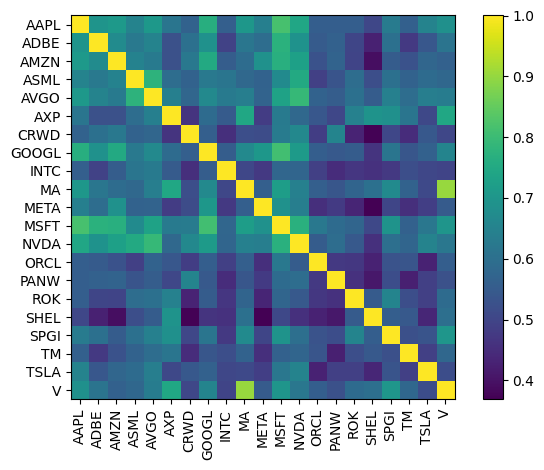

In [ ]:
semi_cov= risk_models.semicovariance(stocks, benchmark=0)
plotting.plot_covariance(semi_cov, plot_correlation=True)

In [ ]:
ef= EfficientFrontier(mu, semi_cov)
ef.efficient_return(0.2)
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.03407),
             ('ADBE', 0.0),
             ('AMZN', 0.0),
             ('ASML', 0.0),
             ('AVGO', 0.0),
             ('AXP', 0.0),
             ('CRWD', 0.0),
             ('GOOGL', 0.00461),
             ('INTC', 0.0),
             ('MA', 0.0),
             ('META', 0.0),
             ('MSFT', 0.0),
             ('NVDA', 0.0),
             ('ORCL', 0.14977),
             ('PANW', 0.0),
             ('ROK', 0.0),
             ('SHEL', 0.0),
             ('SPGI', 0.14713),
             ('TM', 0.46427),
             ('TSLA', 0.0),
             ('V', 0.20015)])

<Axes: title={'center': 'Optimal Portfolio'}>

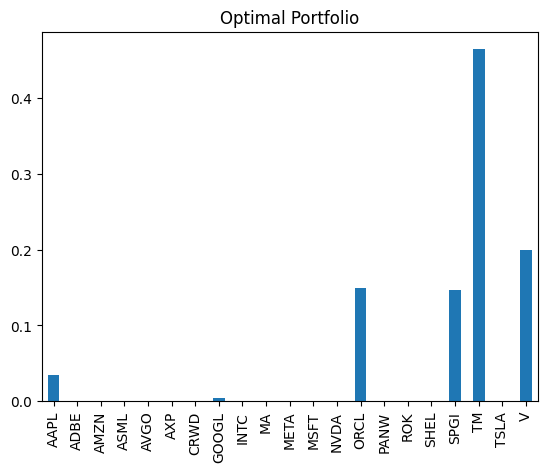

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

>> We can see that, TM has weight of 0.464, meaning 46.4% of the portfolio should be allocated to VOO, followed by V (VISA) about 20%,ORCL (Oracle) 14.9%, SPGI 14.3%, AAPL of 3% and GOOGL 0.4% if I want 20% return from my overall portfoilo.

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.1%
Annual volatility: 15.8%
Sharpe Ratio: 1.27


(0.2013269715435587, 0.1579260495953705, 1.274818005385354)

>> Expected annual return from this portfoilo is 20.1%. 15.8% of annual volatility includes both upside and downside fluctuations. Sharpe ratio of 1.27 indicates that the portfolio is delivering a good risk-adjusted return.

In [ ]:
from pypfopt import EfficientSemivariance


In [ ]:
ef=EfficientSemivariance(mu,semi_cov)
ef.efficient_return(0.2)
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04783),
             ('ADBE', 0.04749),
             ('AMZN', 0.04767),
             ('ASML', 0.0472),
             ('AVGO', 0.0474),
             ('AXP', 0.04776),
             ('CRWD', 0.04694),
             ('GOOGL', 0.04781),
             ('INTC', 0.0474),
             ('MA', 0.04796),
             ('META', 0.04741),
             ('MSFT', 0.04781),
             ('NVDA', 0.04674),
             ('ORCL', 0.04818),
             ('PANW', 0.0476),
             ('ROK', 0.04789),
             ('SHEL', 0.04794),
             ('SPGI', 0.04806),
             ('TM', 0.04837),
             ('TSLA', 0.04642),
             ('V', 0.04812)])

<Axes: title={'center': 'Optimal Portfolio'}>

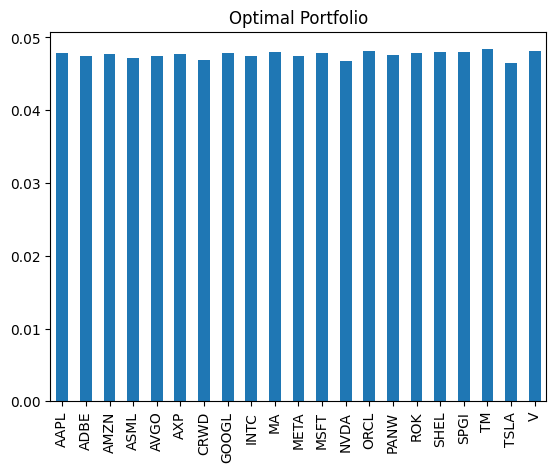

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.2%
Annual semi-deviation: 0.0%
Sortino Ratio: inf


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_semivariance.py:272: RuntimeWarning: divide by zero encountered in scalar divide
  sortino_ratio = (mu - risk_free_rate) / semi_deviation


(0.302050035264764, 0.0, inf)

>>Identical weights has been allocated so its better to use the return.

In [ ]:
returns= expected_returns.returns_from_prices(stocks)
returns= returns.dropna()
returns

Ticker,AAPL,ADBE,AMZN,ASML,AVGO,AXP,CRWD,GOOGL,INTC,MA,...,MSFT,NVDA,ORCL,PANW,ROK,SHEL,SPGI,TM,TSLA,V
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-12,0.002548,0.007309,0.006639,0.011266,0.025272,0.016578,-0.009009,0.003154,0.008411,0.007447,...,0.010152,0.030965,0.002841,-0.000353,0.010873,0.006272,-0.006835,-0.000141,0.019790,0.003461
2019-12-13,0.013593,0.039155,0.000346,0.009226,-0.037767,0.016960,0.044609,-0.001201,0.004170,0.013278,...,0.008418,-0.000357,-0.034709,0.000441,-0.009734,-0.005540,0.003367,0.003531,-0.003586,0.013688
2019-12-16,0.017118,0.018431,0.004696,0.010625,0.024444,-0.008339,0.000810,0.010268,-0.001557,0.002938,...,0.006471,0.005179,-0.009539,0.011895,0.004620,0.012535,0.005199,0.003026,0.064483,0.005942
2019-12-17,0.001965,-0.002934,0.012124,0.006383,0.002074,0.010269,-0.021436,-0.004270,-0.006932,-0.003233,...,-0.005401,0.013947,-0.021300,0.004267,-0.003865,0.005330,-0.003852,0.001684,-0.006579,-0.003866
2019-12-18,-0.002389,0.004739,-0.003703,-0.009090,0.011242,-0.005522,0.036164,-0.002199,-0.002269,-0.004257,...,-0.002069,0.005344,0.010409,-0.005419,0.001129,0.000855,-0.007770,-0.002662,0.037362,-0.003342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,0.000123,0.003225,0.010955,-0.011696,-0.000528,-0.006841,0.001867,-0.009921,-0.052823,0.006966,...,0.011888,-0.000482,-0.010362,-0.003831,0.011129,0.002180,-0.012244,-0.002174,0.032297,-0.002646
2024-12-06,-0.000823,0.027387,0.029381,-0.003542,0.053147,0.011513,0.002220,0.011990,0.005769,0.007241,...,0.002146,-0.018061,0.029263,0.007121,-0.005655,-0.017094,0.005604,0.008888,0.053398,0.006244
2024-12-09,0.016101,-0.009097,-0.004140,-0.003470,-0.003286,-0.023915,-0.032955,0.004928,-0.005258,-0.010878,...,0.005523,-0.025484,-0.006469,-0.041784,0.011170,0.022925,-0.006618,0.006024,0.001464,-0.008714


In [ ]:
ef= EfficientSemivariance(mu, returns)
ef.efficient_return(0.2)
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04852),
             ('ADBE', 0.0),
             ('AMZN', 0.05156),
             ('ASML', 0.0),
             ('AVGO', 0.0),
             ('AXP', 0.0),
             ('CRWD', 0.0),
             ('GOOGL', 0.00259),
             ('INTC', 0.0),
             ('MA', 0.0),
             ('META', 0.0),
             ('MSFT', 0.0),
             ('NVDA', 0.0),
             ('ORCL', 0.14689),
             ('PANW', 0.01649),
             ('ROK', 0.0),
             ('SHEL', 0.05536),
             ('SPGI', 0.13174),
             ('TM', 0.40148),
             ('TSLA', 0.0),
             ('V', 0.14537)])

<Axes: title={'center': 'Optimal Portfolio'}>

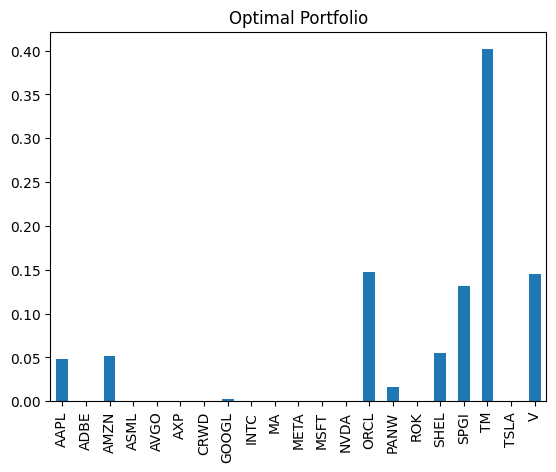

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

>> We can see that, TM has weight of 0.40, meaning 40% of the portfolio should be allocated to TM, followed by ORCL about 14.68%, V (VISA)- 14%, ORCL (Oracle) 14.68%, SPGI about 13%, SHEL about 5%, AMZN 5%, AAPL 4%, PANW about 1%, and GOOGL about 0.2%, if I want 20% return from my overall portfoilo.

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.8%
Annual semi-deviation: 14.8%
Sortino Ratio: 1.41


(0.2084227666570112, 0.14769686369392415, 1.411152284783317)

>> Expected to make 20.8% return from the portfolio. 14.8% semi-deviation indicates downside risk or volatility interms of negative return. A sortino ratio of 1.41 suggests that the portfolio is generating 1.41 units of return for each unit of downside risk which is good risk-adjusted return.

# Add Constraints

>> From above, we see lot of zeros, we need to handle the zero weights for the assets we want to be included in the portfolio.

In [ ]:
#For Covariance
mu= expected_returns.capm_return(stocks)
S= risk_models.CovarianceShrinkage(stocks).ledoit_wolf()

ef= EfficientFrontier(mu, S)

aapl_index=ef.tickers.index('AAPL')
ef.add_constraint(lambda w: w[aapl_index] >= 0.05)

asml_index= ef.tickers.index('ASML')
ef.add_constraint(lambda w: w[asml_index] >=0.01)

crwd_index= ef.tickers.index('CRWD')
ef.add_constraint(lambda w: w[crwd_index] <=0.02)
ef.max_sharpe()
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.05),
             ('ADBE', 0.0518),
             ('AMZN', 0.05409),
             ('ASML', 0.04875),
             ('AVGO', 0.04873),
             ('AXP', 0.04538),
             ('CRWD', 0.02),
             ('GOOGL', 0.04497),
             ('INTC', 0.04759),
             ('MA', 0.04633),
             ('META', 0.04755),
             ('MSFT', 0.04748),
             ('NVDA', 0.05181),
             ('ORCL', 0.04828),
             ('PANW', 0.0611),
             ('ROK', 0.04556),
             ('SHEL', 0.04767),
             ('SPGI', 0.05086),
             ('TM', 0.04814),
             ('TSLA', 0.04934),
             ('V', 0.04455)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.2%
Annual volatility: 26.6%
Sharpe Ratio: 1.13


(0.3019933453477649, 0.2661500056925692, 1.1346734506427119)

<Axes: title={'center': 'Optimal Portfolio'}>

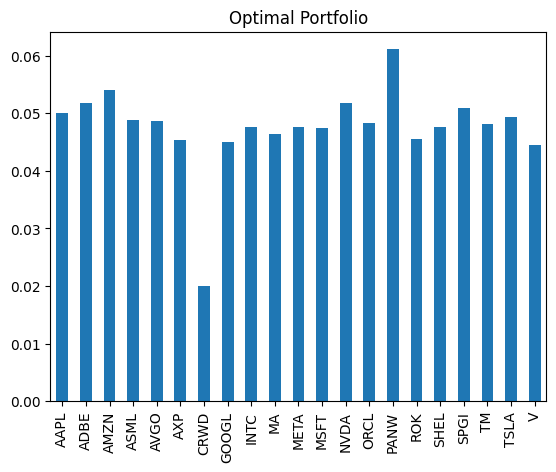

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

In [ ]:
#For Semivariance
ef= EfficientSemivariance(mu, returns)


aapl_index=ef.tickers.index('AAPL')
ef.add_constraint(lambda w: w[aapl_index] >= 0.05)

asml_index= ef.tickers.index('ASML')
ef.add_constraint(lambda w: w[asml_index] >=0.01)

crwd_index= ef.tickers.index('CRWD')
ef.add_constraint(lambda w: w[crwd_index] <=0.02)
ef.efficient_return(0.2)
weights= ef.clean_weights()
weights


OrderedDict([('AAPL', 0.05),
             ('ADBE', 0.0),
             ('AMZN', 0.04579),
             ('ASML', 0.01),
             ('AVGO', 0.0),
             ('AXP', 0.0),
             ('CRWD', 0.0),
             ('GOOGL', 0.00049),
             ('INTC', 0.0),
             ('MA', 0.0),
             ('META', 0.0),
             ('MSFT', 0.0),
             ('NVDA', 0.0),
             ('ORCL', 0.14833),
             ('PANW', 0.01679),
             ('ROK', 0.0),
             ('SHEL', 0.05365),
             ('SPGI', 0.12849),
             ('TM', 0.40101),
             ('TSLA', 0.0),
             ('V', 0.14545)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 21.0%
Annual semi-deviation: 14.8%
Sortino Ratio: 1.42


(0.20967062407777287, 0.14812110924214417, 1.4155350655321473)

<Axes: title={'center': 'Optimal Portfolio'}>

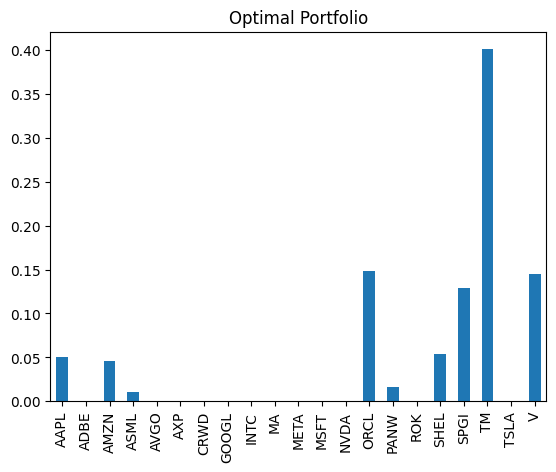

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

# Using Gamma to handle 0 weights


In [ ]:
#For Covariance
mu= expected_returns.capm_return(stocks)
S= risk_models.CovarianceShrinkage(stocks).ledoit_wolf()
ef= EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.5)
ef.efficient_return(0.2)
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.05571),
             ('ADBE', 0.037),
             ('AMZN', 0.0552),
             ('ASML', 0.0194),
             ('AVGO', 0.02939),
             ('AXP', 0.0433),
             ('CRWD', 0.02874),
             ('GOOGL', 0.05449),
             ('INTC', 0.03952),
             ('MA', 0.05591),
             ('META', 0.03389),
             ('MSFT', 0.05122),
             ('NVDA', 0.0),
             ('ORCL', 0.07196),
             ('PANW', 0.05025),
             ('ROK', 0.05756),
             ('SHEL', 0.07715),
             ('SPGI', 0.06682),
             ('TM', 0.09744),
             ('TSLA', 0.00665),
             ('V', 0.06839)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 26.6%
Annual volatility: 23.8%
Sharpe Ratio: 1.12


(0.2660825621187526, 0.23825391610691463, 1.1168024705178405)

In [ ]:
#For Semi variance
mu= expected_returns.capm_return(stocks)
ef= EfficientSemivariance(mu, returns)
ef.add_objective(objective_functions.L2_reg, gamma=0.001)
ef.efficient_return(0.2)
weights= ef.clean_weights()
weights

OrderedDict([('AAPL', 0.05815),
             ('ADBE', 0.03497),
             ('AMZN', 0.05268),
             ('ASML', 0.02213),
             ('AVGO', 0.03066),
             ('AXP', 0.04691),
             ('CRWD', 0.0246),
             ('GOOGL', 0.05393),
             ('INTC', 0.035),
             ('MA', 0.05914),
             ('META', 0.03633),
             ('MSFT', 0.05291),
             ('NVDA', 0.0),
             ('ORCL', 0.07884),
             ('PANW', 0.04744),
             ('ROK', 0.05954),
             ('SHEL', 0.07038),
             ('SPGI', 0.06908),
             ('TM', 0.09652),
             ('TSLA', 0.0),
             ('V', 0.0708)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 26.5%
Annual semi-deviation: 16.8%
Sortino Ratio: 1.58


(0.2646335140521462, 0.16760034709257976, 1.5789556444412782)

>> Expected to make 25.5% return from the portfolio. 16.6% semi-deviation indicates downside risk or volatility interms of negative return. A sortino ratio of 1.54 suggests that the portfolio is generating 1.54 units of return for each unit of downside risk which is good risk-adjusted return.

<Axes: title={'center': 'Optimal Portfolio'}>

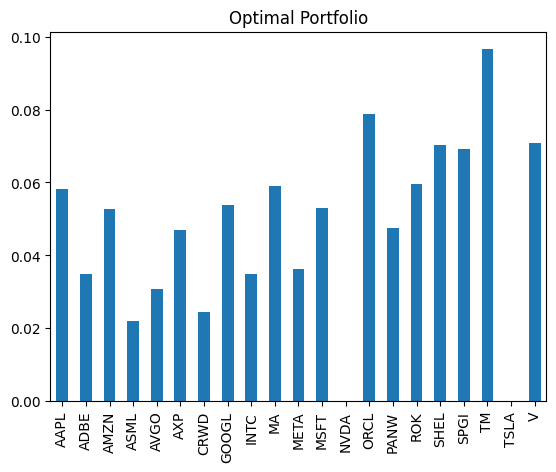

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

#Blck Litterman

In [ ]:
tickers= ['META', 'NVDA', 'AMZN', 'TSLA', 'GOOGL', 'AAPL', 'MSFT', 'CRWD', 'MA', 'V', 'SPGI', 'AXP', 'PANW', 'ROK', 'AVGO', 'ORCL', 'ADBE', 'TM', 'INTC', 'SHEL', 'ASML']

In [ ]:
stocks= yf.download(tickers, period='5y')
stocks

[*********************100%***********************]  21 of 21 completed


Price        Adj Close                                                  \
Ticker            AAPL        ADBE        AMZN        ASML        AVGO   
Date                                                                     
2019-12-11   65.626701  303.739990   87.435997  271.517090   27.549706   
2019-12-12   65.793938  305.959991   88.016502  274.575958   28.245943   
2019-12-13   66.688286  317.940002   88.046997  277.109161   27.179180   
2019-12-16   67.829849  323.799988   88.460503  280.053375   27.843540   
2019-12-17   67.963150  322.850006   89.532997  281.840912   27.901270   
...                ...         ...         ...         ...         ...   
2024-12-05  243.039993  538.219971  220.550003  711.500000  170.470001   
2024-12-06  242.839996  552.960022  227.029999  708.979980  179.529999   
2024-12-09  246.750000  547.929993  226.089996  706.520020  178.940002   
2024-12-10  247.770004  547.049988  225.039993  705.270020  171.809998   
2024-12-11  247.740097  549.914978  229.574997  712.929993  183.410004   

Price                                                                  ...  \
Ticker             AXP        CRWD       GOOGL       INTC          MA  ...   
Date                                                                   ...   
2019-12-11  112.624023   47.730000   66.969734  50.340984  282.051788  ...   
2019-12-12  114.491127   47.299999   67.180962  50.764385  284.152161  ...   
2019-12-13  116.432922   49.410000   67.100258  50.976086  287.925171  ...   
2019-12-16  115.462029   49.450001   67.789268  50.896706  288.771149  ...   
2019-12-17  116.647652   48.389999   67.499802  50.543865  287.837708  ...   
...                ...         ...         ...        ...         ...  ...   
2024-12-05  300.529999  364.839996  172.442368  20.799999  524.770020  ...   
2024-12-06  303.989990  365.649994  174.510010  20.920000  528.570007  ...   
2024-12-09  296.720001  353.600006  175.369995  20.809999  522.820007  ...   
2024-12-10  302.109985  346.774994  185.169998  20.160000  529.010010  ...   
2024-12-11  302.182495  360.618713  192.710007  20.125000  532.989990  ...   

Price         Volume                                                          \
Ticker          MSFT       NVDA      ORCL     PANW     ROK     SHEL     SPGI   
Date                                                                           
2019-12-11  18856600  233796000  12159600  2591700  720300  2044640  1267000   
2019-12-12  24612100  404348000  15413200  2999700  828900  2602211  1779500   
2019-12-13  23845400  454704000  21427700  2521200  938500  4002764  1468700   
2019-12-16  24144200  320976000  19951000  3701100  963000  2794717  1172800   
2019-12-17  25425600  321196000  19778400  2540100  908300  4058154  1667500   
...              ...        ...       ...      ...     ...      ...      ...   
2024-12-05  21697800  172621200   6398100  1695000  993300  4866267   991900   
2024-12-06  18821000  188505600  10503400  1979600  652500  5011472   914200   
2024-12-09  19144400  189308600  20158000  2536700  905300  4651261  1205800   
2024-12-10  18469500  210020900  26502000  1746100  900500  3332021  1369500   
2024-12-11   8678652  132626535   8379052  1005613  451358  2448283   459196   

Price                                    
Ticker          TM       TSLA         V  
Date                                     
2019-12-11  139400  103467000   7138800  
2019-12-12  150000  116458500  11192100  
2019-12-13   89100   98563500   8558100  
2019-12-16   75900  272613000   8249900  
2019-12-17   70600  127452000  10208700  
...            ...        ...       ...  
2024-12-05  405500   81403600   5200100  
2024-12-06  290600   81455800   4302700  
2024-12-09  376000   96359200   5785300  
2024-12-10  237100   97563600   4539500  
2024-12-11  195181   79004641   2397593  

[1259 rows x 126 columns]

In [ ]:
stocks=stocks['Adj Close'].dropna(how='all')
stocks

Ticker,AAPL,ADBE,AMZN,ASML,AVGO,AXP,CRWD,GOOGL,INTC,MA,...,MSFT,NVDA,ORCL,PANW,ROK,SHEL,SPGI,TM,TSLA,V
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-11,65.626701,303.739990,87.435997,271.517090,27.549706,112.624023,47.730000,66.969734,50.340984,282.051788,...,145.098846,5.410815,52.128223,75.656670,185.968155,47.247116,260.825500,141.619995,23.513332,175.693481
2019-12-12,65.793938,305.959991,88.016502,274.575958,28.245943,114.491127,47.299999,67.180962,50.764385,284.152161,...,146.571854,5.578364,52.276340,75.629997,187.990128,47.543438,259.042877,141.600006,23.978666,176.301590
2019-12-13,66.688286,317.940002,88.046997,277.109161,27.179180,116.432922,49.410000,67.100258,50.976086,287.925171,...,147.805725,5.576371,50.461887,75.663330,186.160278,47.280037,259.915131,142.100006,23.892668,178.714859
2019-12-16,67.829849,323.799988,88.460503,280.053375,27.843540,115.462029,49.450001,67.789268,50.896706,288.771149,...,148.762177,5.605250,49.980511,76.563332,187.020309,47.872688,261.266449,142.529999,25.433332,179.776688
2019-12-17,67.963150,322.850006,89.532997,281.840912,27.901270,116.647652,48.389999,67.499802,50.543865,287.837708,...,147.958755,5.683424,48.915905,76.889999,186.297531,48.127857,260.260071,142.770004,25.266001,179.081680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,243.039993,538.219971,220.550003,711.500000,170.470001,300.529999,364.839996,172.442368,20.799999,524.770020,...,442.619995,145.059998,186.240005,403.029999,297.100006,64.349998,513.890015,174.399994,369.489990,309.079987
2024-12-06,242.839996,552.960022,227.029999,708.979980,179.529999,303.989990,365.649994,174.510010,20.920000,528.570007,...,443.570007,142.440002,191.690002,405.899994,295.420013,63.250000,516.770020,175.949997,389.220001,311.010010
2024-12-09,246.750000,547.929993,226.089996,706.520020,178.940002,296.720001,353.600006,175.369995,20.809999,522.820007,...,446.019989,138.809998,190.449997,388.940002,298.720001,64.699997,513.349976,177.009995,389.790009,308.299988


In [ ]:
market_prices= yf.download('SPY', period='5y')['Adj Close']
market_prices

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2019-12-11,291.056580
2019-12-12,293.565247
2019-12-13,293.741089
2019-12-16,295.759094
2019-12-17,295.823883
...,...
2024-12-05,606.659973
2024-12-06,607.809998
2024-12-09,604.679993


In [ ]:
mcaps={}
for t in tickers:
  stock= yf.Ticker(t)
  mcaps[t]= stock.info['marketCap']
mcaps


{'META': 1594063978496,
 'NVDA': 3424679362560,
 'AMZN': 2413275643904,
 'TSLA': 1346813034496,
 'GOOGL': 2367646859264,
 'AAPL': 3745258405888,
 'MSFT': 3333800067072,
 'CRWD': 88851775488,
 'MA': 489258975232,
 'V': 606318493696,
 'SPGI': 160297877504,
 'AXP': 212862156800,
 'PANW': 130390220800,
 'ROK': 33676611584,
 'AVGO': 856584355840,
 'ORCL': 494829568000,
 'ADBE': 242061590528,
 'TM': 235287117824,
 'INTC': 86799122432,
 'SHEL': 197631819776,
 'ASML': 283137441792}

In [ ]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

In [ ]:
S= risk_models.CovarianceShrinkage(stocks).ledoit_wolf()
delta= black_litterman.market_implied_risk_aversion(market_prices)
delta

3.8714700606487904

<Axes: >

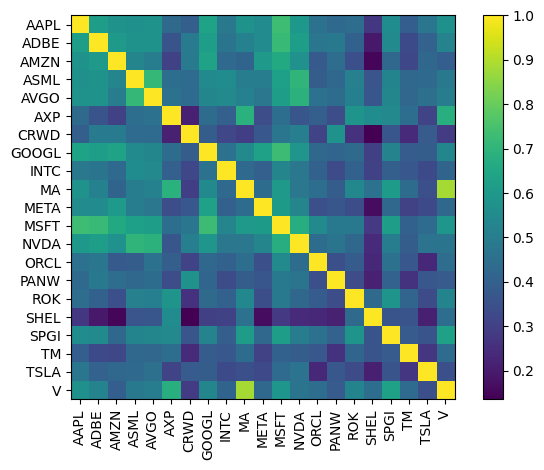

In [ ]:
plotting.plot_covariance(S, plot_correlation=True)

In [ ]:
market_prior= black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

,0
Ticker,
AAPL,0.308441
ADBE,0.340871
AMZN,0.324436
ASML,0.378960
AVGO,0.351823
AXP,0.235248
CRWD,0.355408
GOOGL,0.304577
INTC,0.297136


<Axes: title={'center': 'Prior Returns'}, ylabel='Ticker'>

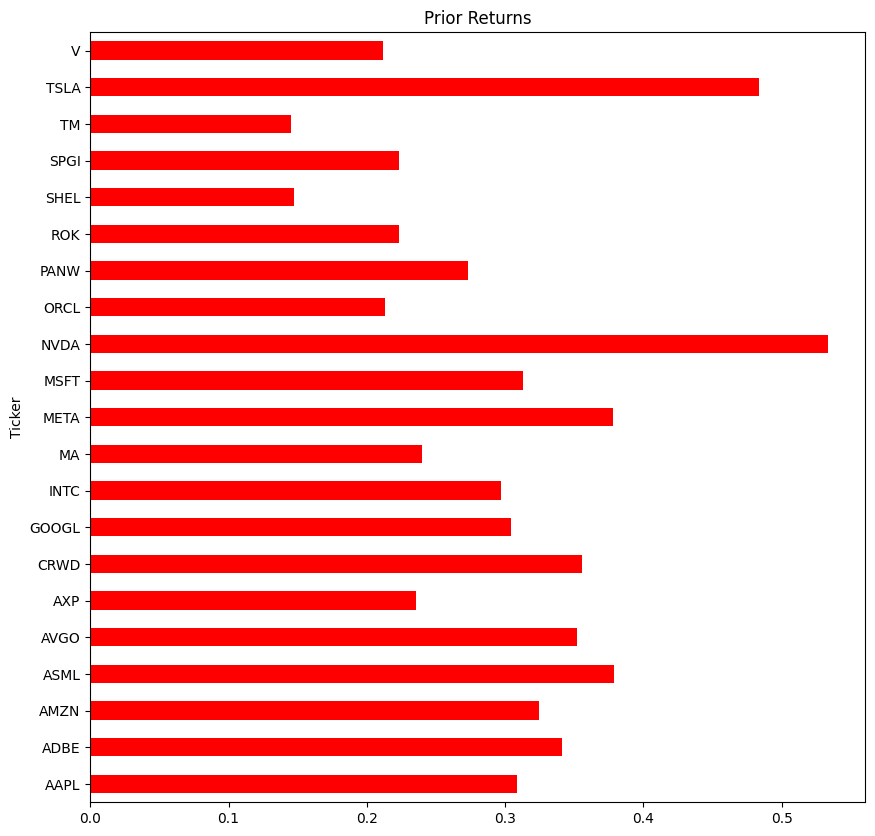

In [ ]:
market_prior.plot(kind='barh', title='Prior Returns', figsize=(10,10), color='red')

>> The above is returns from the market point of view.

In [ ]:
view_dict= {
    'AAPL':0.10,
    'ADBE': 0.20,
    'AXP': 0.4,
    'AMZN': 0.15,
    'ASML': 0.15,
    'CRWD': 0.18,
    'META': 0.09,
    'TM': -0.02,
    'INTC': -0.05}

In [ ]:
b1= BlackLittermanModel(S, pi=market_prior, absolute_views=view_dict)

In [ ]:
#confidence should be equal to our view
confidences= [
    0.15,
    0.2,
    0.4,
    0.25,
    0.8,
    0.7,
    0.2,
    0.5,
    0.7
]

In [ ]:
b1= BlackLittermanModel(S, pi=market_prior, absolute_views=view_dict, omega='idzorek', view_confidences=confidences)

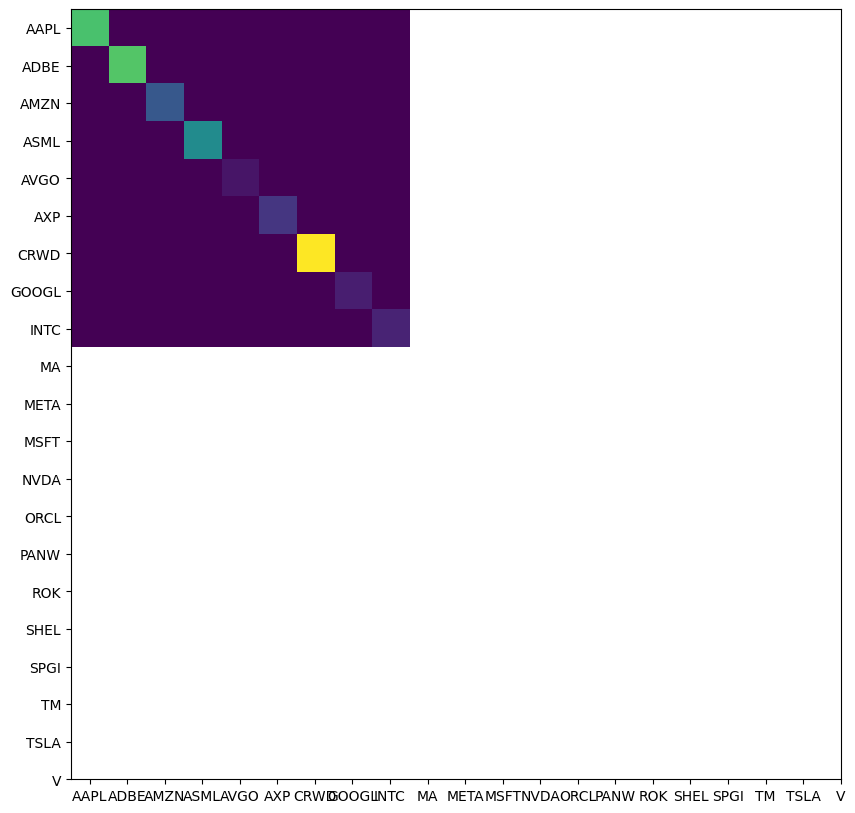

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
im= ax.imshow(b1.omega)

ax.set_xticks(np.arange(len(b1.tickers)))
ax.set_yticks(np.arange(len(b1.tickers)))

ax.set_xticklabels(b1.tickers)
ax.set_yticklabels(b1.tickers)
plt.show()

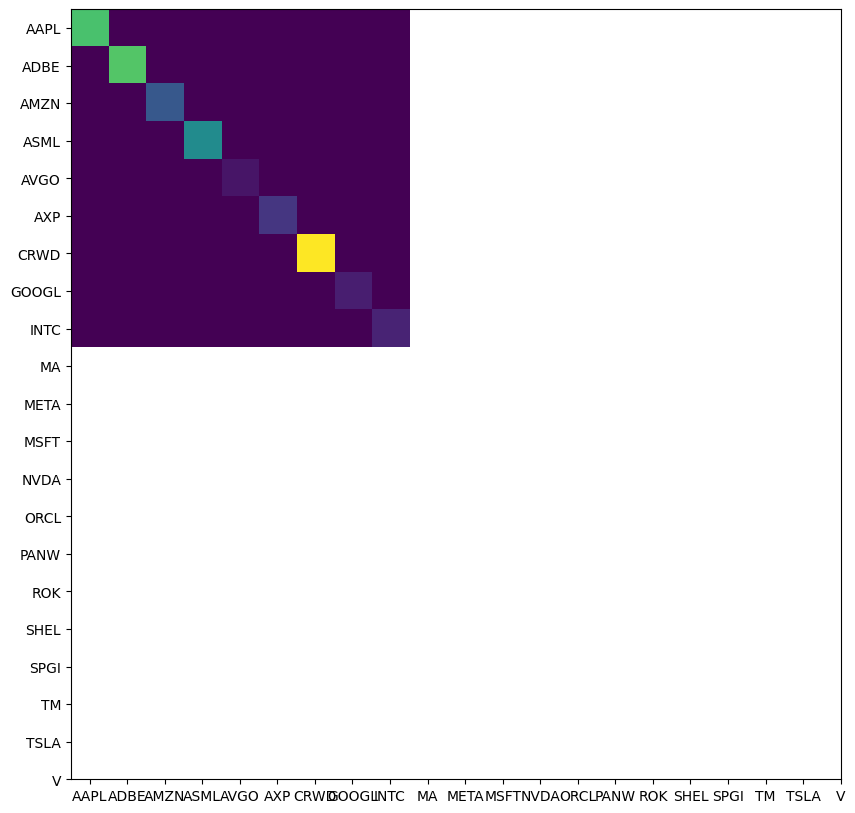

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
im= ax.imshow(b1.omega)
ax.set_xticks(np.arange(len(b1.tickers)))
ax.set_yticks(np.arange(len(b1.tickers)))
ax.set_xticklabels(b1.tickers)
ax.set_yticklabels(b1.tickers)
plt.show()

In [ ]:
np.diag(b1.omega)

array([0.02862611, 0.02945667, 0.01110647, 0.01940592, 0.0023477 ,
       0.00635607, 0.04011664, 0.00331493, 0.00400061])

In [ ]:
intervals= [
    (0,0.25),
    (-0.1,0.15),
    (0,0.3),
    (-0.1,0.15),
    (-0.1,0.15),
    (-0.1,0.15),
    (-0.1,0.15),
    (0,0.2),
    (0,0.2)
    ]

In [ ]:
variances=[]
for lb, ub in intervals:
  sigma= (ub-lb)/2
  variances.append(sigma**2)

print(variances)
omega= np.diag(variances)

[0.015625, 0.015625, 0.0225, 0.015625, 0.015625, 0.015625, 0.015625, 0.010000000000000002, 0.010000000000000002]


# Posterior Estimates

In [ ]:
b1= BlackLittermanModel(S, pi=market_prior, market_caps= mcaps, risk_aversion= delta, absolute_views=view_dict, omega=omega)

In [ ]:
ret_b1= b1.bl_returns()
ret_b1

,0
Ticker,
AAPL,0.186565
ADBE,0.203538
AMZN,0.190264
ASML,0.207898
AVGO,0.207920
AXP,0.180172
CRWD,0.202018
GOOGL,0.189541
INTC,0.095308


In [ ]:
rets_df= pd.DataFrame([market_prior, ret_b1, pd.Series(view_dict)], index=['Market Prior', 'Posterior', 'Views']).T
rets_df


,Market Prior,Posterior,Views
AAPL,0.308441,0.186565,0.10
ADBE,0.340871,0.203538,0.20
AMZN,0.324436,0.190264,0.15
ASML,0.378960,0.207898,0.15
AVGO,0.351823,0.207920,NaN
AXP,0.235248,0.180172,0.40
CRWD,0.355408,0.202018,0.18
GOOGL,0.304577,0.189541,NaN
INTC,0.297136,0.095308,-0.05
MA,0.239723,0.161347,NaN


>> BlackLitterman has the result that lies between the market return and our view.

<Axes: >

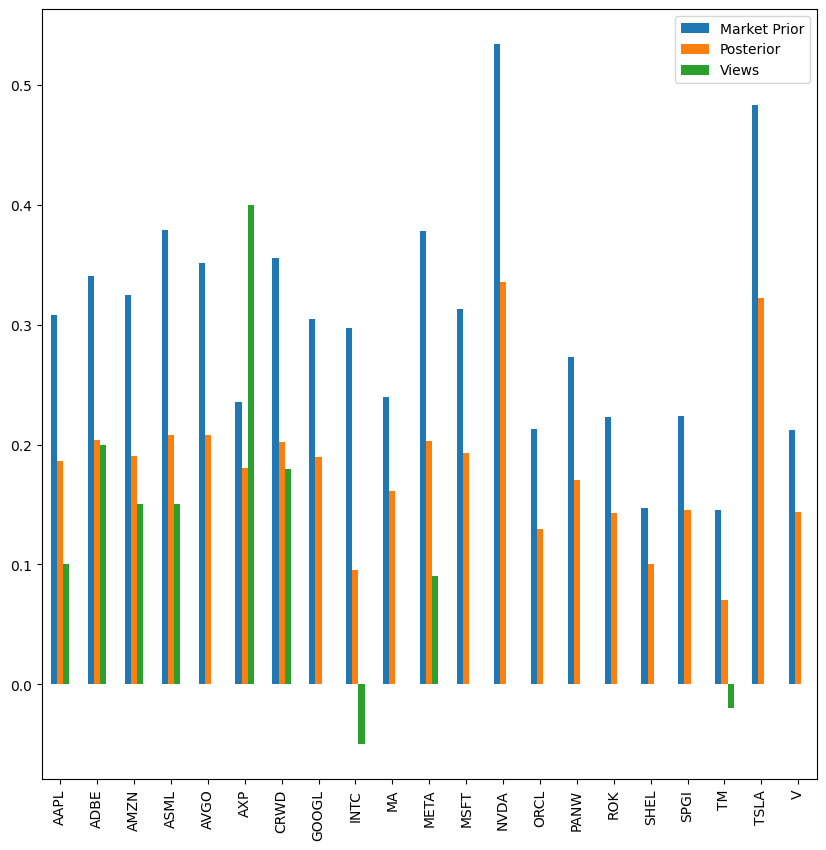

In [ ]:
rets_df.plot(kind='bar', figsize=(10,10))

<Axes: >

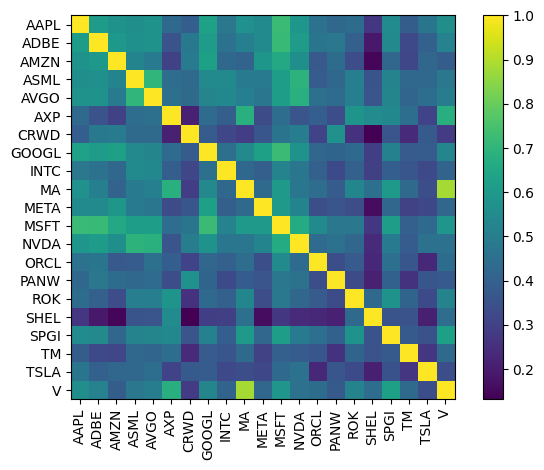

In [ ]:
S_b1= b1.bl_cov()
plotting.plot_covariance(S_b1, plot_correlation=True)

In [ ]:
ef= EfficientFrontier(ret_b1, S_b1)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights= ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.05659),
             ('ADBE', 0.0546),
             ('AMZN', 0.05568),
             ('ASML', 0.04531),
             ('AVGO', 0.05219),
             ('AXP', 0.05585),
             ('CRWD', 0.04226),
             ('GOOGL', 0.05889),
             ('INTC', 0.0),
             ('MA', 0.04709),
             ('META', 0.05165),
             ('MSFT', 0.0586),
             ('NVDA', 0.10211),
             ('ORCL', 0.03453),
             ('PANW', 0.04134),
             ('ROK', 0.03565),
             ('SHEL', 0.02442),
             ('SPGI', 0.04057),
             ('TM', 0.01008),
             ('TSLA', 0.09044),
             ('V', 0.04216)])

<Axes: title={'center': 'Optimal Portfolio'}>

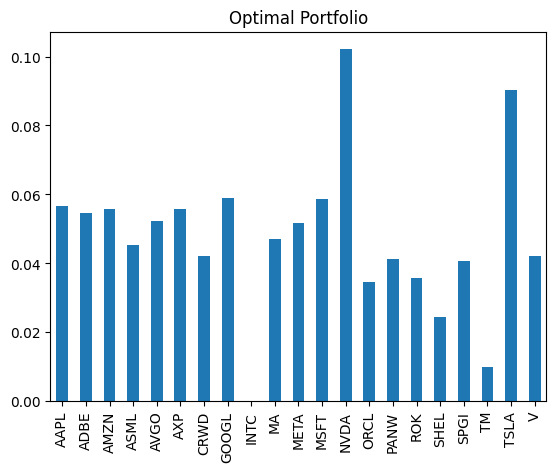

In [ ]:
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

#HRP ALLocation

In [ ]:
from pypfopt import HRPOpt

In [ ]:
hrp= HRPOpt(returns)
hrp.optimize()
weights= hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.03356),
             ('ADBE', 0.02974),
             ('AMZN', 0.03394),
             ('ASML', 0.01929),
             ('AVGO', 0.02283),
             ('AXP', 0.03203),
             ('CRWD', 0.03004),
             ('GOOGL', 0.05618),
             ('INTC', 0.04838),
             ('MA', 0.06034),
             ('META', 0.03503),
             ('MSFT', 0.03632),
             ('NVDA', 0.02155),
             ('ORCL', 0.0622),
             ('PANW', 0.03823),
             ('ROK', 0.05967),
             ('SHEL', 0.06564),
             ('SPGI', 0.05535),
             ('TM', 0.16166),
             ('TSLA', 0.02348),
             ('V', 0.07455)])

<Axes: title={'center': 'Optimal Portfolio'}>

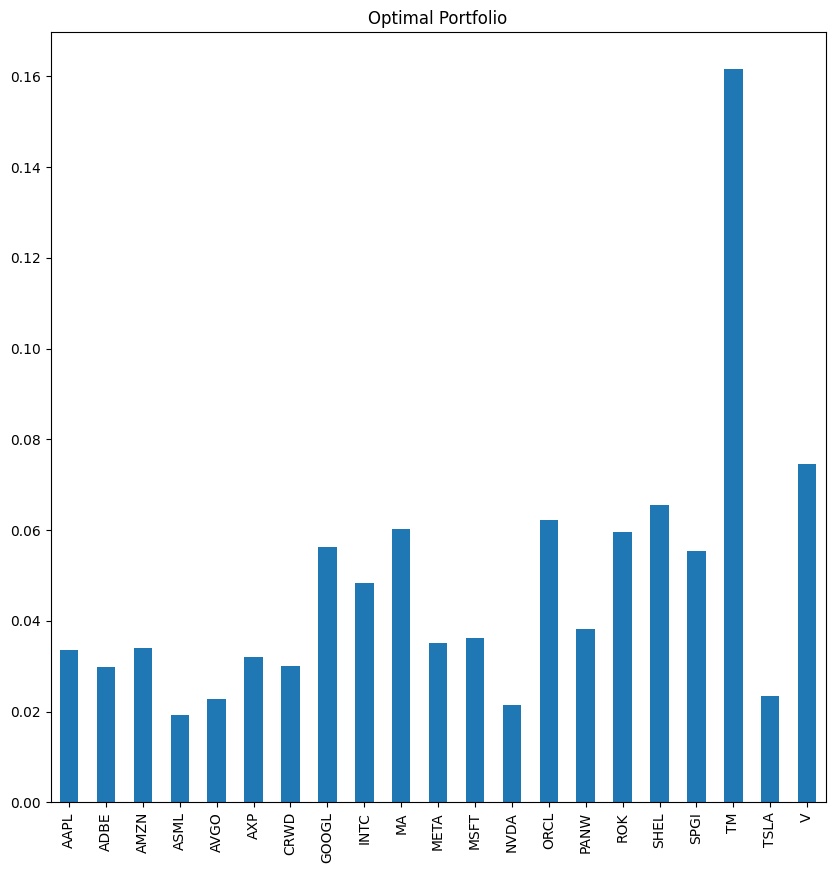

In [ ]:
plt.figure(figsize=(10,10))
pd.Series(weights).plot(kind='bar', title='Optimal Portfolio')

In [ ]:
hrp.portfolio_performance(verbose=True)

Expected annual return: 23.2%
Annual volatility: 24.0%
Sharpe Ratio: 0.97


(0.2321247303004459, 0.23995665289295925, 0.9673610941889281)

<Axes: >

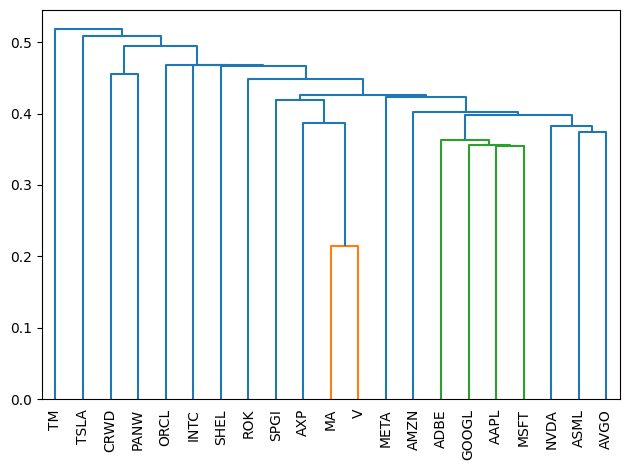

In [ ]:

plotting.plot_dendrogram(hrp, figsize=(10,10), show_leaf_counts=True, show_leaf_labels=True)

# THE END